In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML


In [114]:
df = pd.read_csv('alltests_with_normalized_results.csv')

In [124]:
norm_grouped = df.groupby(['benchmark', 'machine', 'limits'])['normalized'].mean().to_frame()

In [125]:
HTML(norm_grouped.to_html())

In [12]:
withcpu_only = norm_grouped.copy()
withcpu_only.reset_index(inplace=True)
withcpu_only = withcpu_only[withcpu_only['limits'] != 'without']
len(withcpu_only.index)

673

In [20]:
# show number of tests with normalized result (speedup/slowdown) within 10% of the base result
len(withcpu_only[(withcpu_only.normalized >= 0.90) & (withcpu_only.normalized <= 1.10)])

24

In [21]:
# show number of tests with normalized result outside this 10%
len(withcpu_only[((withcpu_only['normalized'] < 0.90) | (withcpu_only['normalized'] > 1.10))])

39

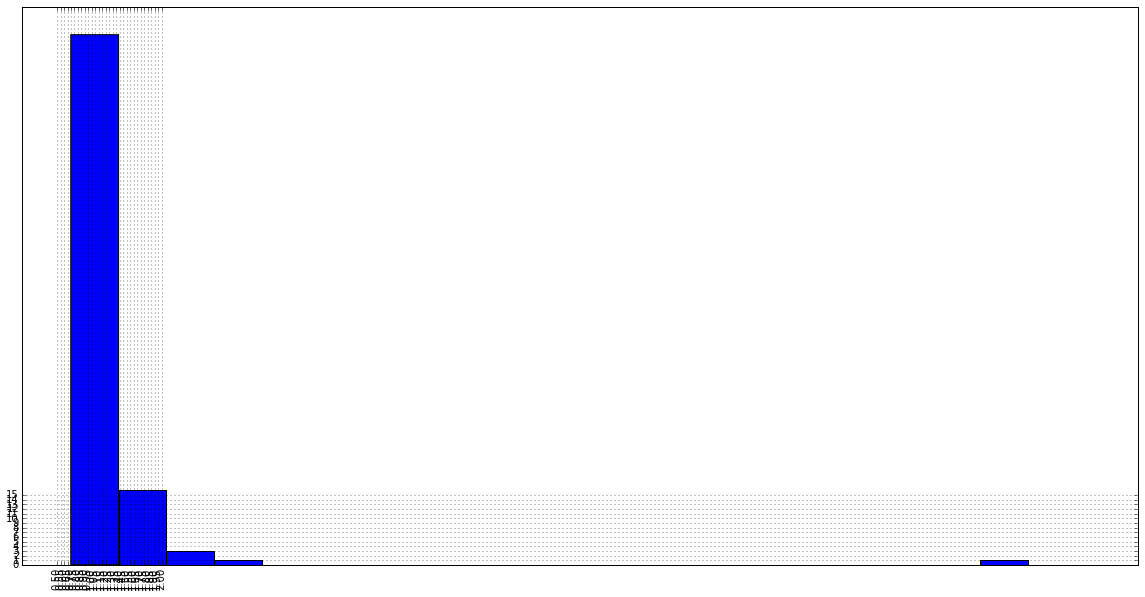

In [13]:
plt.figure(figsize=(20,10))
bins=[.5, .55,.6,.65,.7,.75,.8,.85,.9,.95,1,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2]
ax = withcpu_only[withcpu_only['machine'] == 'dwill.soe.ucsc.edu'].normalized.hist(bins=20,xrot=90)
ticks = ax.set_xticks(bins)
ticks = ax.set_yticks(range(0,16))

In [27]:
withcpumem_only = norm_grouped.copy()
withcpumem_only.reset_index(inplace=True)
withcpumem_only = withcpumem_only[withcpumem_only['limits'] == 'withmemcpu']
len(withcpumem_only.index)

63

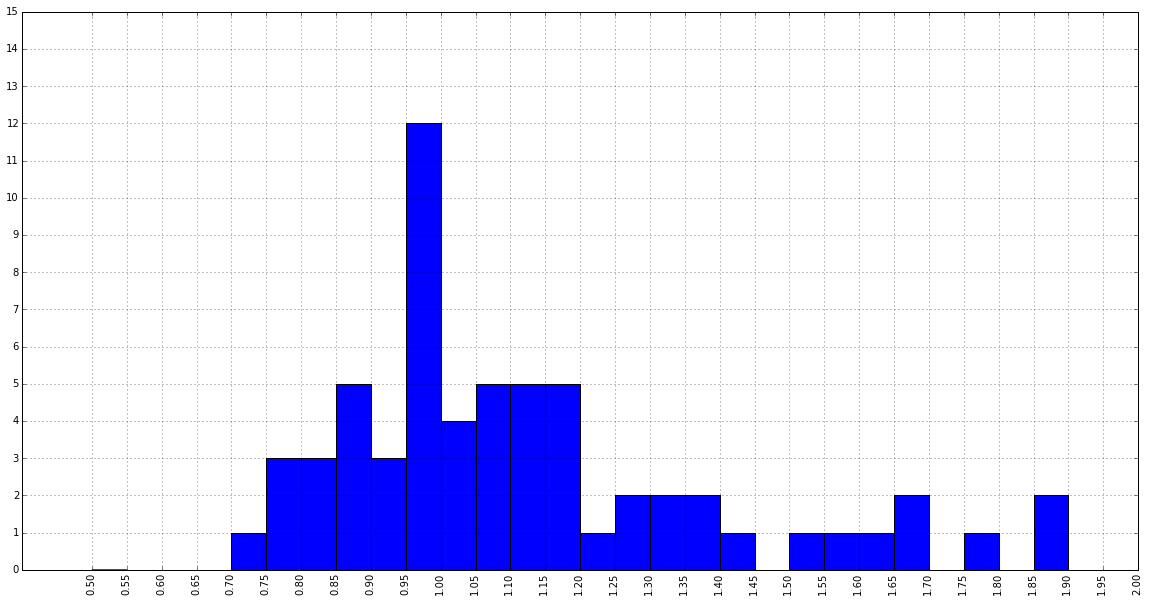

In [44]:
plt.figure(figsize=(20,10))
bins=[.5, .55,.6,.65,.7,.75,.8,.85,.9,.95,1,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2]
ax = withcpu_only.normalized.hist(bins=bins,xrot=90)
ticks = ax.set_xticks(bins)
ticks = ax.set_yticks(range(0,16))

In [230]:
df = pd.read_csv('alltests_with_normalized_results.csv')

In [231]:
df.benchmark.unique()

array(['stressng-cpu-ackermann', 'stressng-cpu-bitops',
       'stressng-cpu-callfunc', 'stressng-cpu-cdouble',
       'stressng-cpu-cfloat', 'stressng-cpu-clongdouble',
       'stressng-cpu-correlate', 'stressng-cpu-crc16',
       'stressng-cpu-decimal32', 'stressng-cpu-decimal64',
       'stressng-cpu-decimal128', 'stressng-cpu-dither',
       'stressng-cpu-djb2a', 'stressng-cpu-double', 'stressng-cpu-euler',
       'stressng-cpu-explog', 'stressng-cpu-fft', 'stressng-cpu-fibonacci',
       'stressng-cpu-float', 'stressng-cpu-fnv1a', 'stressng-cpu-gamma',
       'stressng-cpu-gcd', 'stressng-cpu-gray', 'stressng-cpu-hamming',
       'stressng-cpu-hanoi', 'stressng-cpu-hyperbolic',
       'stressng-cpu-idct', 'stressng-cpu-int128', 'stressng-cpu-int64',
       'stressng-cpu-int32', 'stressng-cpu-int16', 'stressng-cpu-int8',
       'stressng-cpu-int128float', 'stressng-cpu-int128double',
       'stressng-cpu-int128longdouble', 'stressng-cpu-int128decimal32',
       'stressng-cpu-int128

In [232]:
len(df.benchmark.unique())

68

In [233]:
norm_grouped = df.copy().groupby(['benchmark','machine', 'limits', 'class'])['normalized'].mean().to_frame()

In [234]:
norm_grouped.reset_index(inplace=True)


In [157]:
norm_grouped.copy().groupby(['machine', 'limits', 'class'])['normalized'].mean().to_frame()

normalized
machine                       limits     class            
192.168.140.82                quota-7111 cpu      1.134567
                              without    cpu      2.125464
192.168.140.86                quota-6352 cpu      0.964158
                              without    cpu      2.700994
clnode056.clemson.cloudlab.us quota-7009 cpu      0.969390
                              without    cpu      1.928182
dwill.soe.ucsc.edu            quota-5465 cpu      1.397166
                              without    cpu      2.661158
nibbler.soe.ucsc.edu          quota-7116 cpu      1.089086
                              without    cpu      2.265287

In [158]:
norm_grouped.copy().groupby(['machine', 'limits', 'class'])['normalized'].median().to_frame()

normalized
machine                       limits     class            
192.168.140.82                quota-7111 cpu      0.949862
                              without    cpu      1.785181
192.168.140.86                quota-6352 cpu      0.886945
                              without    cpu      2.485209
clnode056.clemson.cloudlab.us quota-7009 cpu      0.891621
                              without    cpu      1.773238
dwill.soe.ucsc.edu            quota-5465 cpu      1.349446
                              without    cpu      2.529131
nibbler.soe.ucsc.edu          quota-7116 cpu      1.045794
                              without    cpu      2.181686

In [161]:
norm_grouped[(norm_grouped.normalized > .83) & (norm_grouped.normalized < .93)].copy().groupby(['machine', 'limits', 'class'])['normalized'].count().to_frame()

normalized
machine                       limits     class            
192.168.140.82                quota-7111 cpu             8
                              without    cpu             1
192.168.140.86                quota-6352 cpu            16
clnode056.clemson.cloudlab.us quota-7009 cpu            15
dwill.soe.ucsc.edu            quota-5465 cpu             1
nibbler.soe.ucsc.edu          quota-7116 cpu            14

In [28]:
pd.unique(norm_grouped['class'])

array(['cpu', 'processor', 'memory', 'cpu-cache', 'matrix', 'string'], dtype=object)

In [94]:
df[(df['machine'] == 'nibbler.soe.ucsc.edu') & (df['benchmark'] == 'stressng-cpu-bitops')]

,benchmark,base_result,machine,limits,class,repetition,result,normalized
56,stressng-cpu-bitops,1304.974705,nibbler.soe.ucsc.edu,quota-7116,cpu,rep-1,1087.474124,0.833330
57,stressng-cpu-bitops,1304.974705,nibbler.soe.ucsc.edu,quota-7116,cpu,rep-2,1092.054254,0.836839
58,stressng-cpu-bitops,1304.974705,nibbler.soe.ucsc.edu,without,cpu,1,2268.385939,1.738260
59,stressng-cpu-bitops,1304.974705,nibbler.soe.ucsc.edu,without,cpu,2,2248.248327,1.722829
76,stressng-cpu-bitops,1304.945833,nibbler.soe.ucsc.edu,quota-7116,cpu,rep-1,1087.474124,0.833348
77,stressng-cpu-bitops,1304.945833,nibbler.soe.ucsc.edu,quota-7116,cpu,rep-2,1092.054254,0.836858
78,stressng-cpu-bitops,1304.945833,nibbler.soe.ucsc.edu,without,cpu,1,2268.385939,1.738299
79,stressng-cpu-bitops,1304.945833,nibbler.soe.ucsc.edu,without,cpu,2,2248.248327,1.722867


In [29]:
pd.unique(norm_grouped.machine)

array(['192.168.140.82', '192.168.140.86', 'clnode056.clemson.cloudlab.us',
       'dwill.soe.ucsc.edu', 'nibbler.soe.ucsc.edu'], dtype=object)

In [99]:
norm_grouped[(norm_grouped['machine'] == '192.168.140.82') & (norm_grouped.limits =='without') & (norm_grouped.normalized > 18)]

,benchmark,machine,limits,class,normalized
51,stressng-cpu-clongdouble,192.168.140.82,without,cpu,19.002985


In [140]:
maxes = norm_grouped.groupby(['machine', 'limits']).max()
maxes.reset_index(inplace=True)
maxes.rename(columns={'normalized': 'normalized_max'}, inplace=True)

mines = norm_grouped.groupby(['machine', 'limits']).min()
mines.reset_index(inplace=True)
mines.rename(columns={'normalized': 'normalized_min'}, inplace=True)

mines.drop('benchmark', axis=1, inplace=True)
maxes.drop('benchmark', axis=1, inplace=True)

maxs_and_mins = pd.merge(maxes, mines, on=['machine','limits','class'])
maxs_and_mins['range'] = maxs_and_mins['normalized_max'] - maxs_and_mins['normalized_min']
maxs_and_mins

,machine,limits,class,normalized_max,normalized_min,range
0,192.168.140.82,quota-7111,cpu,10.109397,0.252564,9.856833
1,192.168.140.82,without,cpu,19.002985,0.475633,18.527352
2,192.168.140.86,quota-6352,cpu,2.532644,0.598816,1.933828
3,192.168.140.86,without,cpu,7.103329,1.649641,5.453688
4,clnode056.clemson.cloudlab.us,quota-7009,cpu,2.551770,0.601367,1.950403
5,clnode056.clemson.cloudlab.us,without,cpu,5.058876,1.192599,3.866277
6,dwill.soe.ucsc.edu,quota-5465,cpu,3.048804,0.776150,2.272655
7,dwill.soe.ucsc.edu,without,cpu,5.624509,1.791514,3.832995
8,nibbler.soe.ucsc.edu,quota-7116,cpu,1.866457,0.743159,1.123298
9,nibbler.soe.ucsc.edu,without,cpu,3.887706,1.543348,2.344358


In [111]:
norm_grouped.groupby(['machine', 'limits']).min()

benchmark class  \
machine                       limits                                     
192.168.140.82                quota-7111  stressng-cpu-ackermann   cpu   
                              without     stressng-cpu-ackermann   cpu   
192.168.140.86                quota-6352  stressng-cpu-ackermann   cpu   
                              without     stressng-cpu-ackermann   cpu   
clnode056.clemson.cloudlab.us quota-7009  stressng-cpu-ackermann   cpu   
                              without     stressng-cpu-ackermann   cpu   
dwill.soe.ucsc.edu            quota-5465  stressng-cpu-ackermann   cpu   
                              without     stressng-cpu-ackermann   cpu   
nibbler.soe.ucsc.edu          quota-7116  stressng-cpu-ackermann   cpu   
                              without     stressng-cpu-ackermann   cpu   

                                          normalized  
machine                       limits                  
192.168.140.82                quota-7111    0.252564  
                              without       0.475633  
192.168.140.86                quota-6352    0.598816  
                              without       1.649641  
clnode056.clemson.cloudlab.us quota-7009    0.601367  
                              without       1.192599  
dwill.soe.ucsc.edu            quota-5465    0.776150  
                              without       1.791514  
nibbler.soe.ucsc.edu          quota-7116    0.743159  
                              without       1.543348

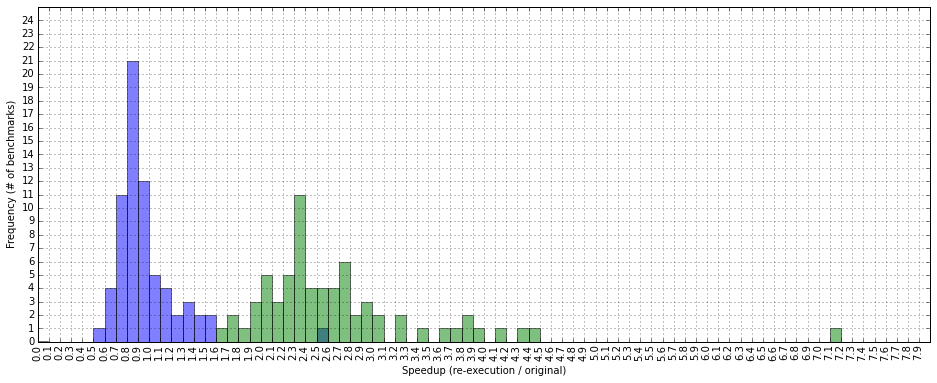

In [236]:
#plt.figure(figsize=(20,10))
bins=[.5, .55,.6,.65,.7,.75,.8,.85,.9,.95,1,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2,3.25,3.5,3.75,4,4.25,4.5,4.75,5,6,7,8,9]
pred=(
      (norm_grouped['machine'] == '192.168.140.86'))

ax = norm_grouped[pred].groupby('limits').normalized.hist(bins=np.arange(0,8,.1),xrot=90,figsize=(16,6),alpha=0.5)
ticks = ax[0].set_xticks(np.arange(0,8,.1))
ticks = ax[0].set_yticks(range(0,25))
plt.xlabel('Speedup (re-execution / original)')
plt.ylabel('Frequency (# of benchmarks)')
plt.savefig('with_and_without_limits.png', bbox_inches='tight', dpi=300)

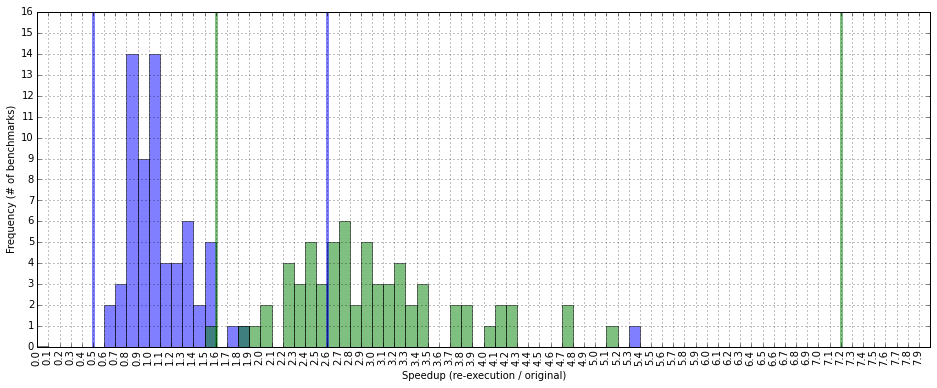

In [229]:
#plt.figure(figsize=(20,10))
bins=[.5, .55,.6,.65,.7,.75,.8,.85,.9,.95,1,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2,3.25,3.5,3.75,4,4.25,4.5,4.75,5,6,7,8,9]
pred=(
      (norm_grouped['machine'] == '192.168.140.86'))

ax = norm_grouped[pred].groupby('limits').normalized.hist(bins=np.arange(0,8,.1),xrot=90,figsize=(16,6),alpha=0.5)
plt.axvline(x=2.6,color='b',linewidth=3, alpha=0.5)
plt.axvline(x=.5,color='b',linewidth=3, alpha=0.5)
plt.axvline(x=7.2,color='g',linewidth=3, alpha=0.5)
plt.axvline(x=1.6,color='g',linewidth=3, alpha=0.5)
ticks = ax[0].set_xticks(np.arange(0,8,.1))
ticks = ax[0].set_yticks(range(0,17))
plt.xlabel('Speedup (re-execution / original)')
plt.ylabel('Frequency (# of benchmarks)')
plt.savefig('benchmarks.png', bbox_inches='tight', dpi=300)

In [223]:
norm_grouped[(norm_grouped['machine'] == '192.168.140.86') & (norm_grouped.limits == 'without') & (norm_grouped.normalized < 1.6)]

,benchmark,machine,limits,class,normalized
361,stressng-memory-malloc,192.168.140.86,without,memory,1.587302
